<a href="https://colab.research.google.com/github/AlexDDemchenko/DERI-Project-2020-21/blob/main/TwitterBotDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [ ]:
import pandas as pd
dataset = pd.read_csv('bots_final.csv')
dataset.head()

,followers_count,friends_count,favorites_count,statuses_count,default_profile,default_profile_image,verified,bot
0,62296,62846,31370,150913,1,0,0,1
1,82179,85930,18290,127868,0,0,0,0
2,111034,80255,468466,535703,0,0,0,1
3,47883,50896,123384,147417,1,0,0,0
4,2970,2425,144502,132234,1,1,0,1


In [ ]:
x = dataset.drop(["bot"], axis=1)
y = dataset["bot"]

Split Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Evaluation Function

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np
import math

def eval(model):
  fprs=[1]
  tprs=[1]

  #threshold - 0.9

  for threshold in range(1,10):
    y_pred = model.predict(x_test)
    print("Threshold:",threshold)
    for i in range(len(y_pred)):
      if y_pred[i] > threshold*0.1:
        y_pred[i] = 1
      else:
        y_pred[i] = 0

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    tp = cm[0][0]
    fn = cm[1][0]
    fp = cm[0][1]
    tn = cm[1][1]
    print("Precision:",tp/(tp+fn))
    print("Recall:",tp/(tp+fp))
    
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC:",auc)

    print("F1 Score:",f1_score(y_test,y_pred))
    fprs.append(fpr)
    tprs.append(tpr)

  fprs.append(0)
  tprs.append(0)
  plt.plot(fprs, tprs, label='model')
  plt.plot([0,0.5,1], [0,0.5,1], label='Base Accuracy')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

In [ ]:
x_test.shape

(3061, 7)

**Logistic Regression**

Threshold: 1
[[2147  460]
 [ 218  236]]
Precision: 0.9078224101479916
Recall: 0.8235519754507096
ROC AUC: 0.6716878819984827
F1 Score: 0.41043478260869565
Threshold: 2
[[2147  460]
 [ 218  236]]
Precision: 0.9078224101479916
Recall: 0.8235519754507096
ROC AUC: 0.6716878819984827
F1 Score: 0.41043478260869565
Threshold: 3
[[2147  460]
 [ 218  236]]
Precision: 0.9078224101479916
Recall: 0.8235519754507096
ROC AUC: 0.6716878819984827
F1 Score: 0.41043478260869565
Threshold: 4
[[2147  460]
 [ 218  236]]
Precision: 0.9078224101479916
Recall: 0.8235519754507096
ROC AUC: 0.6716878819984827
F1 Score: 0.41043478260869565
Threshold: 5
[[2147  460]
 [ 218  236]]
Precision: 0.9078224101479916
Recall: 0.8235519754507096
ROC AUC: 0.6716878819984827
F1 Score: 0.41043478260869565
Threshold: 6
[[2147  460]
 [ 218  236]]
Precision: 0.9078224101479916
Recall: 0.8235519754507096
ROC AUC: 0.6716878819984827
F1 Score: 0.41043478260869565
Threshold: 7
[[2147  460]
 [ 218  236]]
Precision: 0.9078224101479916


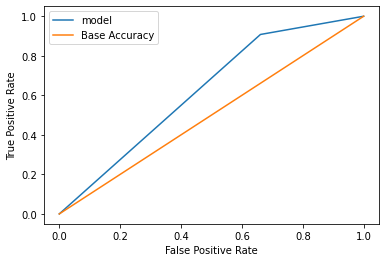

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

eval(log_reg)

**XGB Regressor**

[21:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Threshold: 1
[[2146  461]
 [  31  423]]
Precision: 0.9857602204869086
Recall: 0.823168392788646
ROC AUC: 0.8774432272313274
F1 Score: 0.632286995515695
Threshold: 2
[[2377  230]
 [  56  398]]
Precision: 0.9769831483764899
Recall: 0.9117759877253548
ROC AUC: 0.8942139850521047
F1 Score: 0.7356746765249537
Threshold: 3
[[2441  166]
 [  93  361]]
Precision: 0.9632991318074191
Recall: 0.93632527809743
ROC AUC: 0.8657397315597282
F1 Score: 0.7359836901121306
Threshold: 4
[[2527   80]
 [ 124  330]]
Precision: 0.953225198038476
Recall: 0.969313387034906
ROC AUC: 0.8480928168654707
F1 Score: 0.7638888888888891
Threshold: 5
[[2559   48]
 [ 177  277]]
Precision: 0.9353070175438597
Recall: 0.9815880322209436
ROC AUC: 0.795860095405626
F1 Score: 0.711168164313222
Threshold: 6
[[2576   31]
 [ 203  251]]
Precision: 0.9269521410579346
Recall: 0.9881089374760261
ROC AUC: 0.770

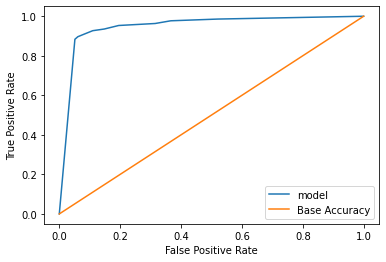

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train,y_train)

eval(xgb_reg)

Labeling New Bot Accounts

In [ ]:
maybe_bots = pd.read_csv("output.csv")
predictions = xgb_reg.predict(maybe_bots.drop(["username","Bot Score"], axis=1))

In [ ]:
bot=0
print("Likely Bot Accounts:")
for i in range(len(predictions)):
  if predictions[i] > 0.8:
    print(maybe_bots["username"][i])
    bot += 1
print(bot)

Likely Bot Accounts:
SocHeiress
theresamax
CMargaronis
courageousgirl2
foggybottomgal
Empnew
inabster
Betterw05759703
davidpsdem
esau_egan
monicasloves
Analisa_Swan
awelab1956
MayIrmamay14
Elgordova1
STabbytosavit
_V3ritas
FeistyLibLady
SaleemulHuq
Katpa73
ManMet80
RJalterego1
CarolynEvertso1
BudGothmog44
1FreshTake
JustWhatNowWhy
stockguy61
MisterSalesman
Varidienne
nasty_woman2
GrammaGaz
Bugs4US
MooPersists
CarlyJA22
Drewdferguson
linda_wed1
PoliticalBee
62WalterP
WETHEPEOPLEPACK
IloveFlorida001
bethsinniresist
tucsonrosie2001
DemocratGrandma
MtnManMT6
sherpeace
nevermore_007
ButterflyLove_8
jbm32753
dad_darius
artsycarol
AndrewL51599940
Angie_RejoinEU
shareitarie10
Backstorymom1
iamLucretiaMott
marynlm
BrianKelvin18
wildwillow65
TucsonBlonde
TheTobster111
MaddieBarry8
ActDontReact
dunaisiaka
KidCasteel
kdw_8437
missb62
BlueSt0rmRising
HanianEmpress
TanziaMill
Jay_USMC2
thumperftw
barryspoints
SandraDunn1955
ladiesgun
ps9714
klingensmith_j
PrincessBravato
jcmarbury
24baseballReed
000